Questions:
- Can I add pyprojects in all directories for more comfortable notebook usage (problem with sys path)? P.S. I cannot create a local environment only for aquathon, would be wierd
- What about tropical cyclon? SHould I just say that people can take look on the notebook fr tropical cyclon by them selfes? 


# AQUAthon 
- [Atmospheric global mean biases diagnostic](#atmospheric-global-mean-biases-diagnostic)
- [ECmean4 Performance Indices](#ecmean4-performance-indices)
- [Global mean time series](#global-mean-time-series)
- [Ocean3D diagnostic](#ocean3d-diagnostic)
- [Radiation Budget Diagnostic](#radiation-budget-diagnostic)
- [Sea ice diagnostics](#sea-ice-diagnostics)
- [Sea Surface Height (SSH) Variability Diagnostics Application](#sea-surface-height-ssh-variability-diagnostics-application)
- [Tropical Cyclones diagnostic](#tropical-cyclones-diagnostic-for-tracking-and-zoom-in)
- [Teleconnections diagnostic](#teleconnections-diagnostic)
- [Diagnostic of tropical rainfalls](#diagnostic-of-tropical-rainfalls)

In [6]:
from aqua import Reader

# Save the original sys.path
import sys
original_sys_path = sys.path.copy()

import os
import aqua
sys.path.insert(0, os.path.join(aqua.__path__[0], '../','diagnostics'))
diagnostic_sys_path = sys.path.copy()

You can access the data with Reader by specifying the model, experiment, and source names. 

## Atmospheric global mean biases diagnostic 

Main authors: 
- Susan Sayed (DWD, susan.sayed@dwd.de)

The purpose of this diagnostic is to provide a set of basic statistics and plots for different variables and climate models. These models will be compared to reanalysis data (e.g. ERA5) or with other models or climatologies. It uses the AQUA framework to read and retrieve the cataloged data via the 'Reader' class. The diagnostic reads various experiments through the Low Resolution Archive (LRA) to compute and plot global mean biases.

In [7]:
# Set sys path to the diagnostic_sys_path
sys.path = diagnostic_sys_path
from atmglobalmean import seasonal_bias, compare_datasets_plev

In [3]:
# Loading ERA5 data
reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve()

# Loading IFS-NEMO historcal data
reader_ifs_historical = Reader(model="IFS", exp="historical-1990-devcon", source="lra-r100-monthly")
data_ifs_historical = reader_ifs_historical.retrieve()

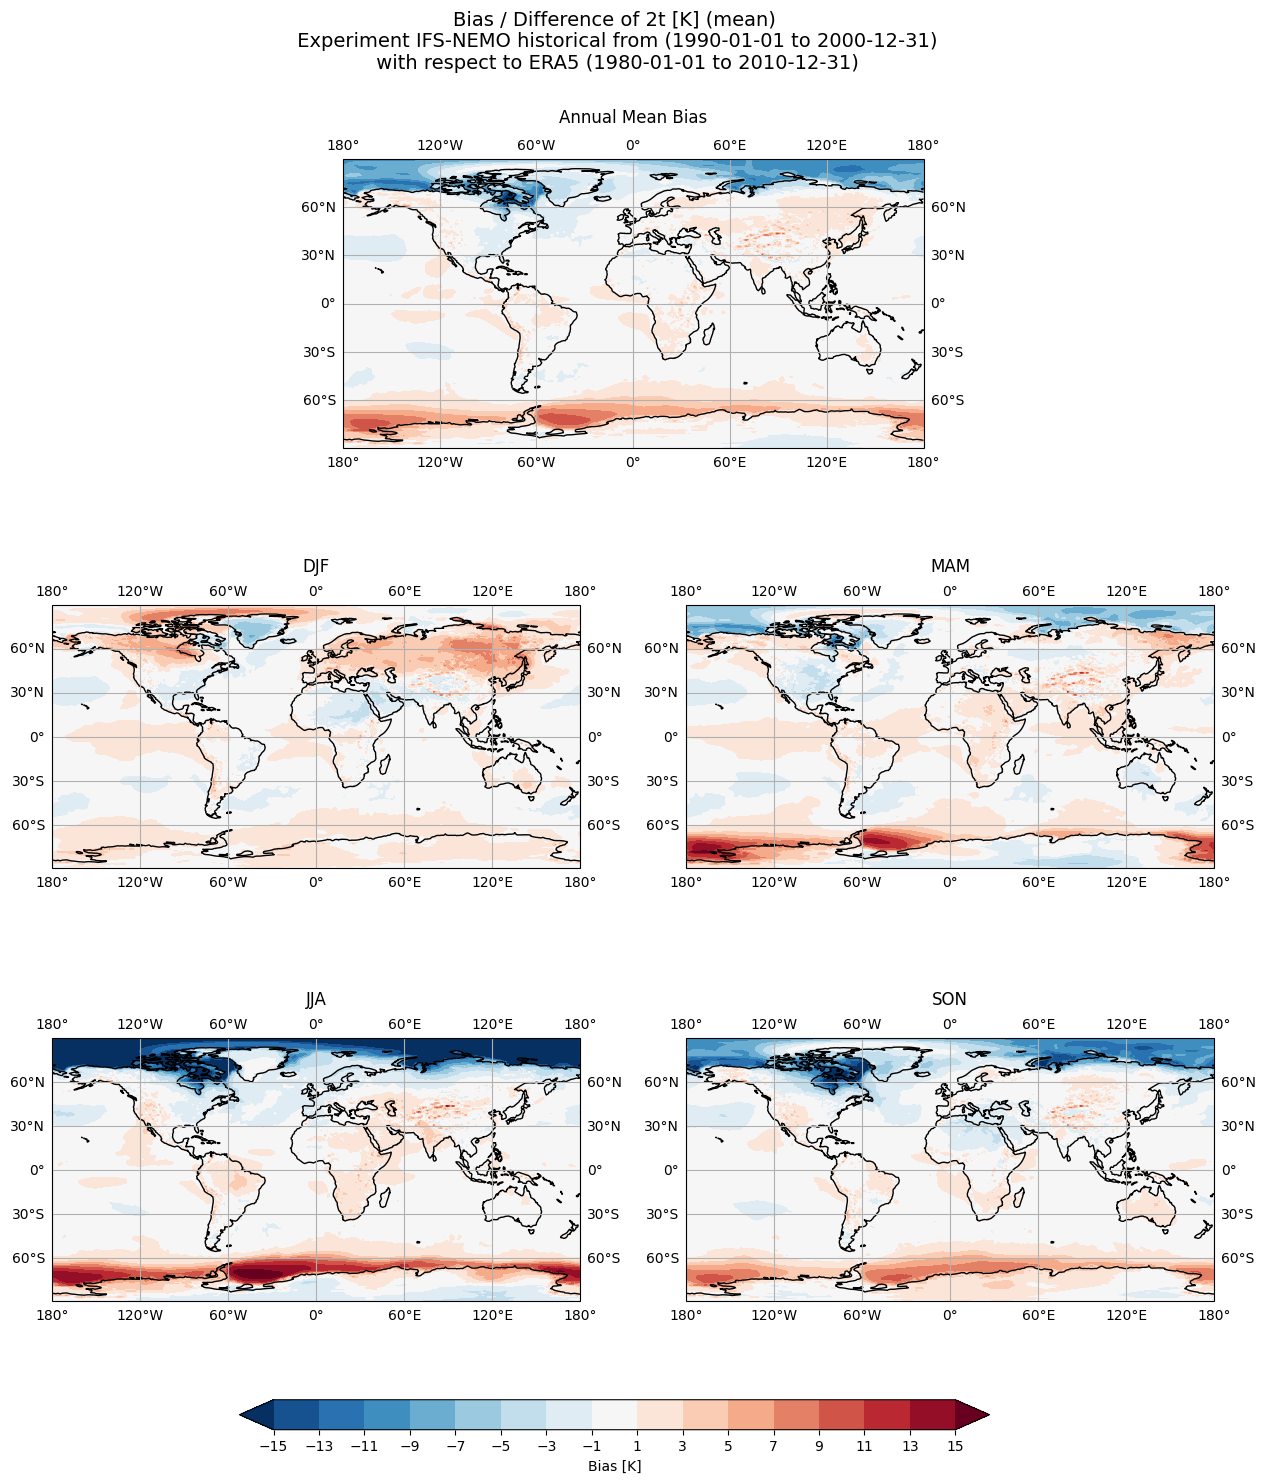

In [13]:
seasonal_bias(
    dataset1=data_ifs_nemo_historical,
    dataset2=data_era5,
    var_name='2t',
    plev=None,
    model_label1='IFS-NEMO historical',
    model_label2='ERA5',
    start_date1 ='1990-01-01',
    end_date1 ='2000-12-31',
    start_date2 ='1980-01-01',
    end_date2 ='2010-12-31',
    vmin=-15,
    vmax=15,
    nlevels=16
    )

In [ ]:
seasonal_bias(
    dataset1=data_ifs_nemo_historical,
    dataset2=data_era5,
    var_name='avg_tos',
    plev=None,
    model_label1='IFS-NEMO historical',
    model_label2='ERA5',
    start_date1 ='1990-01-01',
    end_date1 ='2001-12-31',
    start_date2 ='1980-01-01',
    end_date2 ='2010-12-31',
    vmin=-4,
    vmax=4,
    nlevels=9,
    seasons=False
    )

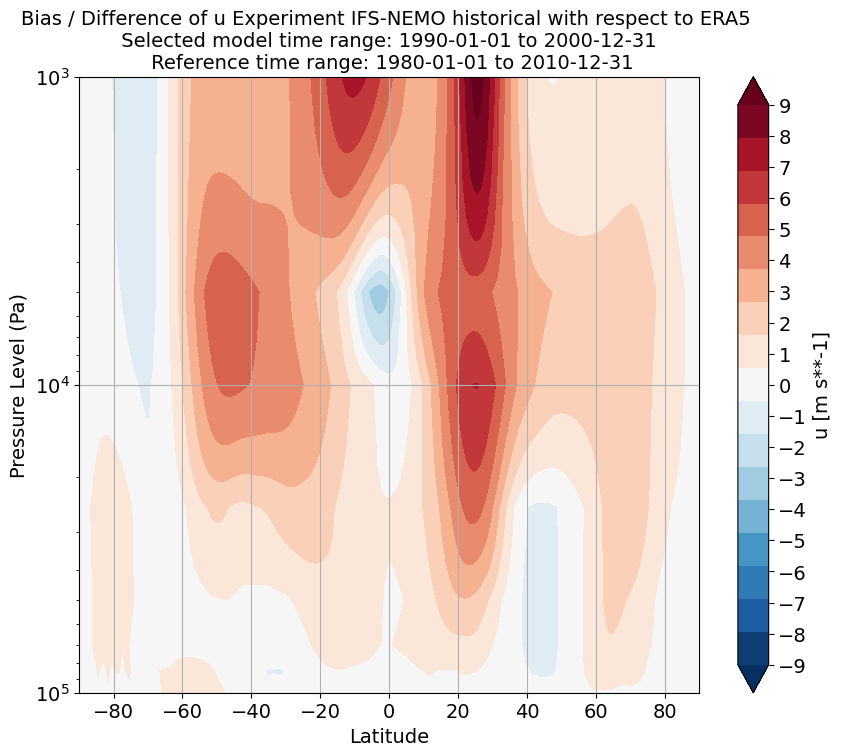

In [15]:
compare_datasets_plev(
    dataset1=data_ifs_nemo_historical,
    dataset2=data_era5,
    var_name='u',
    model_label1='IFS-NEMO historical',
    model_label2='ERA5',
    start_date1 ='1990-01-01',
    end_date1 ='2000-12-31',
    start_date2 ='1980-01-01',
    end_date2 ='2010-12-31',
    plev_min = 1000,
    plev_max = 100000,
    vmin = -9,
    vmax = 9
    )

## ECmean4 Performance Indices

Main authors: 
- Paolo Davini (CNR-ISAC, p.davini@isac.cnr.it)

This incorporates within AQUA the feature of the open-source package ECmean4. 
With this tool is possible to compute global mean and Reichler and Kim performance indices, basing the analysis on a low resolution version of the required data. Further information can be obtained from the [Official ECmean4 Documentation](https://ecmean4.readthedocs.io/en/latest/)

## Global mean time series

Main authors:
- Lukas Kluft (MPI, lukas.kluft@mpimet.mpg.de)
- Matteo Nurisso (CNR, m.nurisso@isac.crn.it)

This diagnostic computes and plots:

- Global mean time series of various variables
- Gregory-like analysis of radiation imbalance to diagnose model drift
- Seasonal cycle of global mean of various variables

In [8]:
# Restore the original sys.path
sys.path = original_sys_path
from global_time_series import Timeseries

## Ocean3D diagnostic

Main authors: 
- Supriyo Ghosh (BSC, supriyo.ghosh@bsc.es)
- Pablo Ortega (BSC, pablo.ortega@bsc.es)

The current release of Ocean3D diagnostics includes two submodules with dedicated functions and notebooks: `ocean_drifts`  to characterise and monitor model drifts and `ocean_circulation` to evaluate the realism of the model in simulating key precursors of the ocean circulation


## Radiation Budget Diagnostic

Main authors: 
- Susan Sayed (DWD, susan.sayed@dwd.de)


This diagnostic computes and plots biases of radiation variables and uses the nextGEMS Cycle 3 data as input.


## Sea ice diagnostics

Main authors: 
- François Massonnet (UCLouvain, francois.massonnet@uclouvain.be)

The sea ice diagnostic computes the sea ice extent (SIE).
The SIE is defined as the areal integral of all ocean grid cells that contain at least 15% of sea ice concentration (SIC).

## Sea Surface Height (SSH) Variability Diagnostics Application

Main authors:
- Tanvi Sharma (AWI, tanvi.sharma@awi.de)
Developments and modifications:
- Jaleena Sunny (AWI, jaleena.sunny@awi.de)

This application calculates the sea surface height standard deviation for multiple models (e.g. FESOM, ICON, NEMO) and compares them against the AVISO model. It also provides visualization of the SSH variability for the models.

In [9]:
sys.path = diagnostic_sys_path
from ssh import sshVariability
# Modify the putput path in config_file=os.path.join(diagnostic_sys_path[0], 'ssh', 'config.yaml')

In [22]:
analyzer = sshVariability(config_file=os.path.join(diagnostic_sys_path[0], 'ssh', 'config.yaml'))
analyzer.run()

TypeError: sshVariability.run() got an unexpected keyword argument 'output_directory'

# Tropical Cyclones diagnostic for tracking and zoom in

Main authors: 
- Paolo Ghinassi (CNR-ISAC, p.ghinassi@isac.cnr.it)
- Paolo Davini (CNR-ISAC, p.davini@isac.cnr.it)


A diagnostic to identify tropical cyclones (TCs) centres (mean sea level pressure minima) and compute their trajectories based 
on the tempest-extremes python library (https://climate.ucdavis.edu/tempestextremes.php). In addition to detection and tracking
it features the possibility to save selected variables in a box in the vicinity of TCs centres along trajectories.

# Teleconnections diagnostic

Main authors: 
- Matteo Nurisso (m.nurisso@isac.cnr.it)

The folder contains jupyter-notebooks and python scripts in order to evaluate teleconnections in the DE_340 AQUA model evaluation framework.
The script are based on the `AQUA` framework.

At the moment the following teleconnections are available:
- [NAO](https://github.com/oloapinivad/DestinE-Climate-DT/blob/main/diagnostics/teleconnections/notebooks/NAO.ipynb)
- [ENSO](https://github.com/oloapinivad/DestinE-Climate-DT/blob/main/diagnostics/teleconnections/notebooks/ENSO.ipynb)

See the documentation for more details on the teleconnections.


In [11]:
# Restore the original sys.path
sys.path = original_sys_path
from teleconnections import Teleconnection

In [14]:
telecname = 'ENSO'

model = 'IFS-NEMO'
exp = 'ssp370'
source = 'lra-r100-monthly'

In [15]:
telec = Teleconnection(model=model, exp=exp, source=source, telecname=telecname, loglevel='INFO')

2024-08-31 01:45:15 :: Teleconnection :: INFO     -> No regrid will be performed, be sure that the data is already at low resolution
2024-08-31 01:45:15 :: Teleconnection :: INFO     -> No time aggregation will be performed, be sure that the data is already at the desired frequency
2024-08-31 01:45:15 :: Teleconnection :: INFO     -> Namelist loaded
2024-08-31 01:45:15 :: ConfigPath :: INFO     -> IFS-NEMO_ssp370_lra-r100-monthly triplet found in in climatedt-phase1!
2024-08-31 01:45:15 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-08-31 01:45:15 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-08-31 01:45:15 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-08-31 01:45:15 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-08-31 01:45:15 :: Reader :: INFO     -> No specific fi

In [16]:
telec.retrieve()

2024-08-31 01:45:31 :: Reader :: INFO     -> Retrieving variables: ['avg_tos']
2024-08-31 01:46:16 :: Teleconnection :: INFO     -> Data retrieved


In [17]:
telec.evaluate_index()

2024-08-31 01:46:18 :: Teleconnection :: INFO     -> Index evaluated


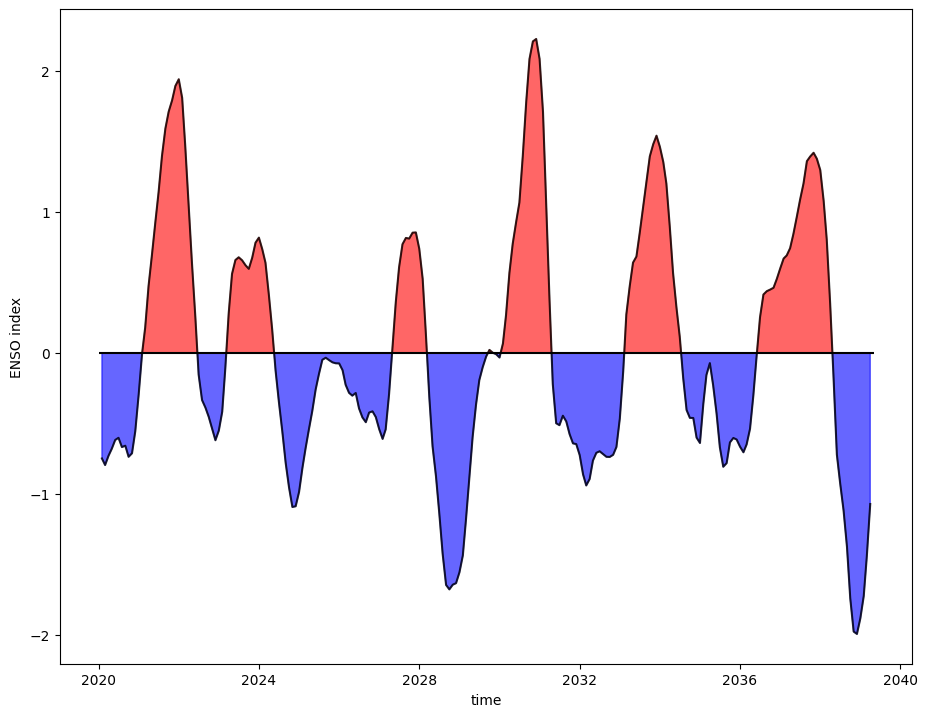

In [18]:
telec.plot_index()

In [19]:
reg = telec.evaluate_regression()

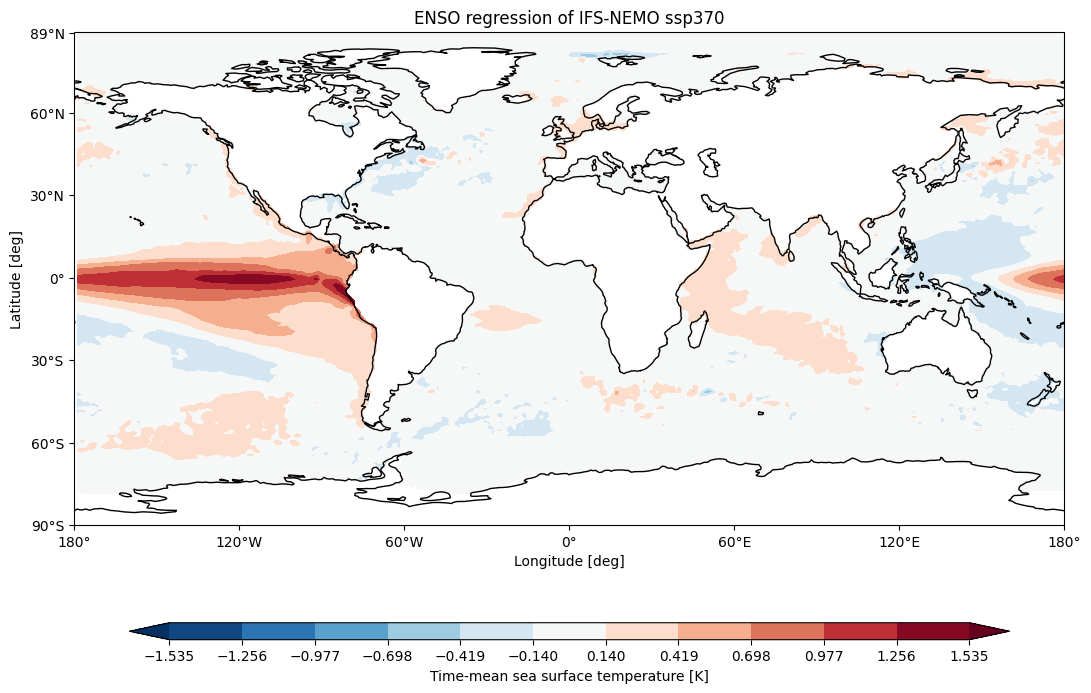

In [20]:
from aqua.graphics import plot_single_map

plot_single_map(data=reg, title='ENSO regression of IFS-NEMO ssp370', sym=True, transform_first=True)

In [21]:
cor = telec.evaluate_correlation()

/home/b/b382267/mambaforge/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


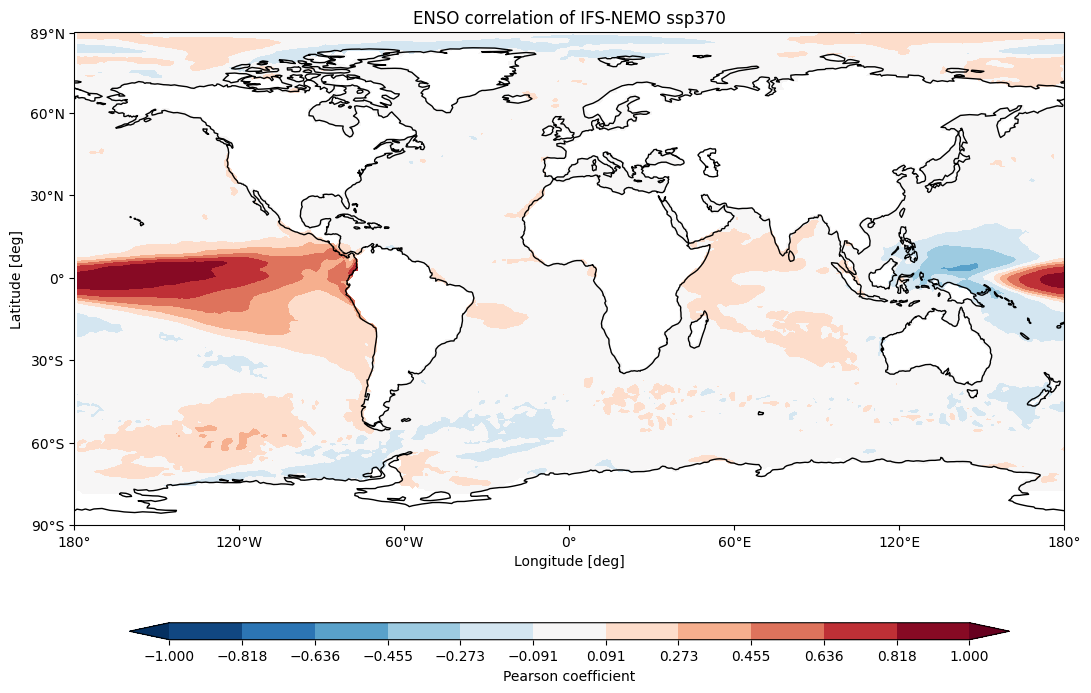

In [22]:
plot_single_map(data=cor, title='ENSO correlation of IFS-NEMO ssp370', cbar_label='Pearson coefficient', vmin=-1, vmax=1, transform_first=True)

# Diagnostic of tropical rainfalls

Main authors: 
- Natalia Nazarova (POLITO, natalia.nazarova@polito.it)

The Tropical-Rainfall Diagnostic analyzes rainfall variability in the tropical zone and compares predictions from climatological models with observations.

The module comprises Python-implemented source files, an environment configuration file, tests, demonstration files, and a command-line interface. A detailed description of the module is available in the AQUA documentation.


In [10]:
# Restore the original sys.path
sys.path = original_sys_path
from tropical_rainfall import Tropical_Rainfall

In [8]:
diag = Tropical_Rainfall(loglevel='warning')

In [9]:
lra_data = {
    'ifs_historical': {'data': data_ifs_historical , 'label': 'ifs_historical'},
    'era5': {'data': data_era5, 'label': 'data_era5'},
    }

In [10]:
histograms = {}

for key, value in lra_data.items():
    histograms[key] = {}
    histograms[key]["data"] = diag.histogram(value["data"],  name_of_file=value["label"])
    histograms[key]["label"] = value["label"]
histograms = diag.tools.add_colors_to_dict(loaded_dict=histograms)

AttributeError: 'Dataset' object has no attribute 'units'